# Systems of Linear Equations

Systems of linear equations can be solved with arrays and NumPy. The given system of linear equations is shown below:

$$ x - \frac{1}{4}y = 4$$
$$ -\frac{1}{4}x +y = 0 $$

NumPy's np.linalg.solve() function is used to solve this system of equations for the variables x and y


In [7]:
import numpy as np

In [8]:
A = np.array([[1, -1/4], [-1/4, 1]])
b = np.array([4,0])
x = np.linalg.solve(A, b)
x

array([4.26666667, 1.06666667])

x is the first entry of the array, 
y is the second entry of the array.
The above solution matches exactly with solution gotten by gaussian elimination method on paper i.e. x = $\frac{64}{15}$ and y =  $\frac{16}{15}$  respectively.

In [9]:
norm = np.linalg.norm(x)
norm 

4.397979333992171

In [22]:
from qiskit import Aer
from qiskit.algorithms.linear_solvers.numpy_linear_solver import NumPyLinearSolver
from qiskit.algorithms.linear_solvers.hhl import HHL

matrix = np.array([[1, -1/4], [-1/4, 1]])
vector = np.array([4, 0])

backend = Aer.get_backend('statevector_simulator')
hhl = HHL()

hhl_solution = HHL().solve(matrix, vector)
classical_solution = NumPyLinearSolver().solve(matrix, vector / np.linalg.norm(vector))

print(hhl_solution.euclidean_norm)
print(classical_solution.euclidean_norm)

1.057790971864661
1.0994948334980428


In [23]:
print(classical_solution.state)

[1.06666667 0.26666667]


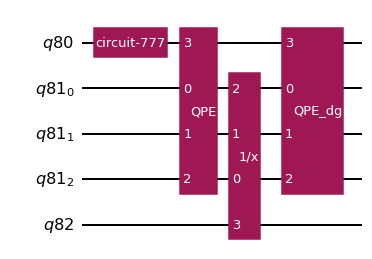

In [26]:
hhl_solution.state.draw('mpl', style='iqx')

In [33]:
from qiskit.algorithms.linear_solvers.observables import AbsoluteAverage, MatrixFunctional

observable = MatrixFunctional(1, 1 / 2)

functional_solution = HHL().solve(matrix, vector, observable)
classical_functional = NumPyLinearSolver().solve(matrix, vector / np.linalg.norm(vector), observable)

print('quantum functional:', functional_solution.observable)
print('classical functional:', classical_functional.observable)

quantum functional: 1.448349758968075
classical functional: 1.4933333333333334
